In [19]:
# We import the libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cmath import nan
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# We open the .csv files in a dataframe.

df = pd.read_csv('titanic.csv')
df2 = pd.read_csv('test-a-mejorar.csv')

1. PassengerId = id del pasajero
2. Survived = 1 = Sobrevivió, 0 = No sobrevivió
3. Pclass = Clase del boleto (1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name = Nombre del pasajero
5. Sex = Sexo del pasajero
6. Age = Edad del pasajero
7. SibSp = Hermanos o cónyuge del pasajero a bordo
8. Parch = Familia directa a bordo
9. Ticket = Número del boleto
10. Fare = Tarifa del pasajero
11. Cabin = Número de cabina
12. Embarked = Puerto de embarque

In [3]:
# We remove unnecessary columns.

df = df.drop(['Name', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

C:\Users\rodri\AppData\Local\Temp\ipykernel_1128\1300497612.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


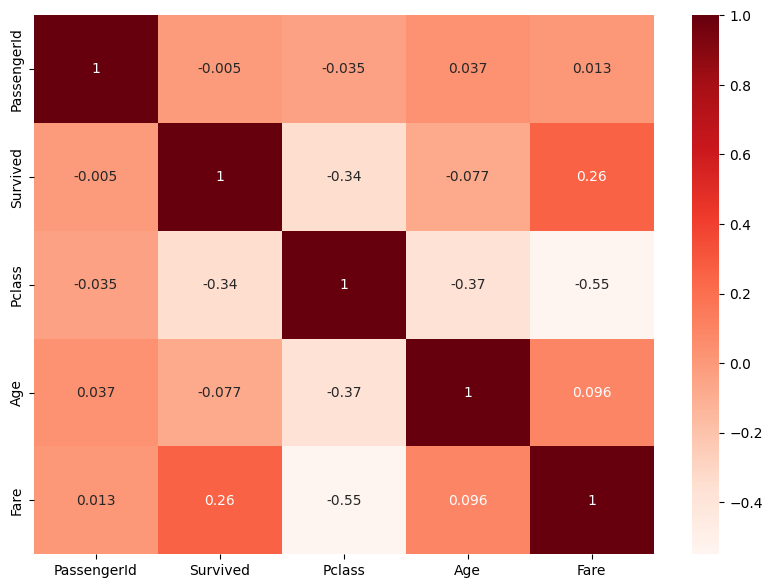

In [4]:
# We create a correlation graph.

plt.figure(figsize = (10, 7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [5]:
# We fill in the null values and replace them by the mean value.

mean = df['Age'].mean()
df['Age'].fillna(mean, inplace = True)
df['Age'].round().astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [6]:
# Remove null values from the 'Fare' column.

df = df.dropna(subset=['Fare'])

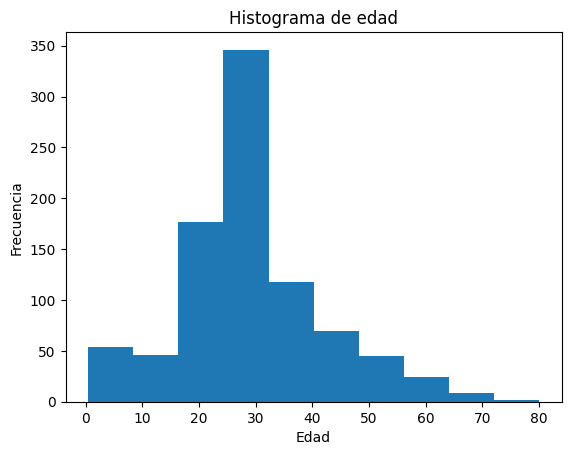

Media:  29.69911764705882
Mediana:  29.69911764705882
Desviación estándar:  13.002015226002882


In [8]:
# We verify that the Age column has the expected data.

median = df['Age'].median()
std = df['Age'].std()

plt.hist(df['Age'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edad')
plt.show()

print("Media: ", mean)
print("Mediana: ", median)
print("Desviación estándar: ", std)

In [9]:
# We change the values in the 'Sex' column to numerical for the model, making 'male' = 1 and 'female' = 0.

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [10]:
# we create a new .csv file with these changes.

df.to_csv('train.csv', index = False)

We do the same procedure for the test.csv file in order to train the model correctly.

In [11]:
df2 = df2.drop(['Name', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [12]:
mean = df['Age'].mean()
df2['Age'].fillna(mean, inplace = True)
df2['Age'].round().astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int32

In [13]:
df2 = df2.dropna(subset=['Fare'])

In [14]:
df2['Sex'] = df2['Sex'].map({'male': 1, 'female': 0})

In [15]:
df2.to_csv('test.csv', index = False)

In [16]:
# Load data into DataFrames.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")

# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'], test_size=0.3)

# Train the model.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions with the test set.
y_pred = clf.predict(X_test)

# Evaluate model performance.
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 73.13%


In [18]:
# Train the model.
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions.
y_pred = clf.predict(X_test)

# Calculate the recall.
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  0.7019230769230769


In [20]:
# Train the model.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions.
y_pred = clf.predict(X_test)

# Calculate the F1-score.
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.676056338028169
